In [33]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
from statsmodels.stats.multicomp import pairwise_tukeyhsd
import datetime
import seaborn

In [34]:
seaborn.set()

In [35]:
# # reading in the data
tesla_stock_data = pd.read_csv("../etl_data/cleaned_tesla_stock_data.csv", parse_dates=['date'])
tesla_stock_data['date'] = tesla_stock_data["date"].dt.date

In [36]:
# seperate the tesla stock data by year
year1 = tesla_stock_data[
    (tesla_stock_data["date"] <= datetime.date(2011, 1, 1))
    & (tesla_stock_data["date"] >= datetime.date(2010, 1, 1))
]
year2 = tesla_stock_data[
    (tesla_stock_data["date"] <= datetime.date(2012, 1, 1))
    & (tesla_stock_data["date"] >= datetime.date(2011, 1, 1))
]
year3 = tesla_stock_data[
    (tesla_stock_data["date"] <= datetime.date(2013, 1, 1))
    & (tesla_stock_data["date"] >= datetime.date(2012, 1, 1))
]
year4 = tesla_stock_data[
    (tesla_stock_data["date"] <= datetime.date(2014, 1, 1))
    & (tesla_stock_data["date"] >= datetime.date(2013, 1, 1))
]
year5 = tesla_stock_data[
    (tesla_stock_data["date"] <= datetime.date(2015, 1, 1))
    & (tesla_stock_data["date"] >= datetime.date(2014, 1, 1))
]
year6 = tesla_stock_data[
    (tesla_stock_data["date"] <= datetime.date(2016, 1, 1))
    & (tesla_stock_data["date"] >= datetime.date(2015, 1, 1))
]
year7 = tesla_stock_data[
    (tesla_stock_data["date"] <= datetime.date(2017, 1, 1))
    & (tesla_stock_data["date"] >= datetime.date(2016, 1, 1))
]
year8 = tesla_stock_data[
    (tesla_stock_data["date"] <= datetime.date(2018, 1, 1))
    & (tesla_stock_data["date"] >= datetime.date(2017, 1, 1))
]
year9 = tesla_stock_data[
    (tesla_stock_data["date"] <= datetime.date(2019, 1, 1))
    & (tesla_stock_data["date"] >= datetime.date(2018, 1, 1))
]
year10 = tesla_stock_data[
    (tesla_stock_data["date"] <= datetime.date(2020, 1, 1))
    & (tesla_stock_data["date"] >= datetime.date(2019, 1, 1))
]
year11 = tesla_stock_data[
    (tesla_stock_data["date"] <= datetime.date(2021, 1, 1))
    & (tesla_stock_data["date"] >= datetime.date(2020, 1, 1))
]
year12 = tesla_stock_data[
    (tesla_stock_data["date"] <= datetime.date(2022, 1, 1))
    & (tesla_stock_data["date"] >= datetime.date(2021, 1, 1))
]
year13 = tesla_stock_data[
    (tesla_stock_data["date"] <= datetime.date(2023, 1, 1))
    & (tesla_stock_data["date"] >= datetime.date(2022, 1, 1))
]

In [37]:
# performs the anova test on the yearly tesla stock change percent
anova = stats.f_oneway(
    year1["change_percent"],
    year2["change_percent"],
    year3["change_percent"],
    year4["change_percent"],
    year5["change_percent"],
    year6["change_percent"],
    year7["change_percent"],
    year8["change_percent"],
    year9["change_percent"],
    year10["change_percent"],
    year11["change_percent"],
    year12["change_percent"],
    year13["change_percent"],
)

# anova test results
print("ANOVA Test results:")
print(anova)
print(anova.pvalue, "\n")


ANOVA Test results:
F_onewayResult(statistic=2.057887391698598, pvalue=0.016639290072616553)
0.016639290072616553 



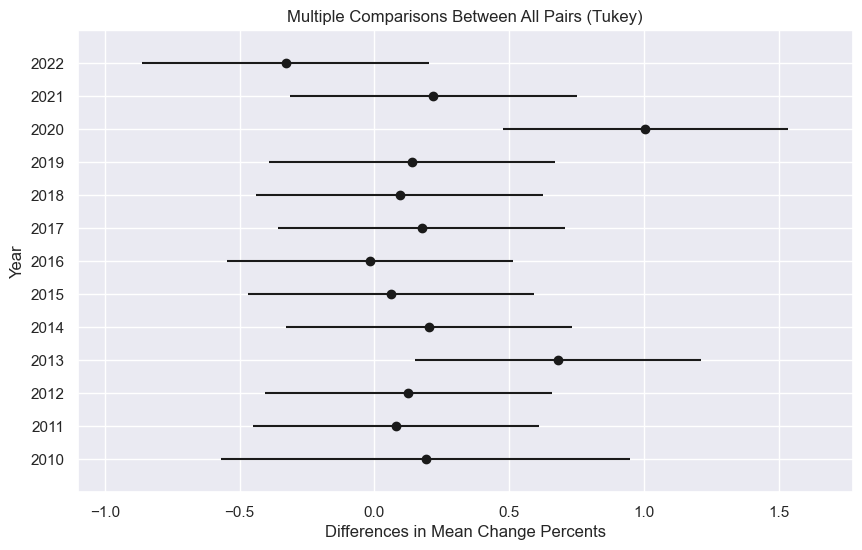

In [38]:
# creates a dataframe for posthoc tuckey analysis
years = pd.DataFrame(
    {
        "2010": year1["change_percent"],
        "2011": year2["change_percent"],
        "2012": year3["change_percent"],
        "2013": year4["change_percent"],
        "2014": year5["change_percent"],
        "2015": year6["change_percent"],
        "2016": year7["change_percent"],
        "2017": year8["change_percent"],
        "2018": year9["change_percent"],
        "2019": year10["change_percent"],
        "2020": year11["change_percent"],
        "2021": year12["change_percent"],
        "2022": year13["change_percent"]
    }
)

# melts the dataframe and drops invalid rows
yearsMelt = pd.melt(years)
yearsMelt = yearsMelt.filter(items=['value', 'variable']).dropna()

# run the tuckey test and print its result, then analyze with the human eye to make conclusions
posthoc = pairwise_tukeyhsd(yearsMelt["value"], yearsMelt["variable"], alpha=0.05)
fig = posthoc.plot_simultaneous(xlabel="Differences in Mean Change Percents", ylabel="Year")
fig.savefig("../figures/teslaStockTukey.jpg")